In [1]:
import pandas as pd
import numpy as np
import sklearn
import chardet
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
from sklearn.metrics import classification_report
from scipy.stats import mode
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Imporing Data

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
file = iris.data

KMeans

In [4]:
model = KMeans(n_clusters=3, random_state=5)
clusters = model.fit_predict(file)
model.cluster_centers_.shape

(3, 4)

In [5]:
labels = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
    labels[mask] = mode(iris.target[mask])[0]

In [6]:
accuracy_score(iris.target, labels)

0.8933333333333333

Using PCS to reduce the dimention

In [7]:
scaler = StandardScaler()
scaled = scaler.fit_transform(file)

pca = PCA(n_components=2)

principal_components = pca.fit_transform(scaled)
                    
proj = pd.DataFrame(data = principal_components, 
                           columns = ['pc_1', 'pc_2'])

In [8]:
kmeans = KMeans(n_clusters=3, random_state=5)
clusters = kmeans.fit_predict(proj)

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(iris.target[mask])[0]

In [9]:
accuracy_score(iris.target, labels)

0.8333333333333334

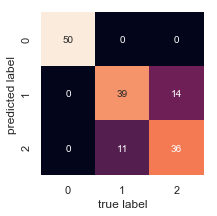

In [10]:
mat = confusion_matrix(iris.target, labels)
plt.figure(figsize=(3,3))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=set(iris.target),
            yticklabels=set(iris.target))
plt.xlabel('true label')
plt.ylabel('predicted label');

Using TSNE to reduce the dimention

In [11]:
tsne = TSNE(n_components=2, init='random', random_state=8)
transform = tsne.fit_transform(file)

In [12]:
model = KMeans(n_clusters=3, random_state=8)
clusters = model.fit_predict(transform)

In [13]:
labels = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
    labels[mask] = mode(iris.target[mask])[0]
accuracy_score(iris.target, labels)

0.9133333333333333

ready


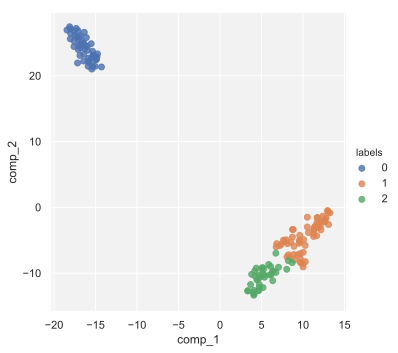

In [14]:
sns.set_style("darkgrid", {"axes.facecolor": ".95"})
%config InlineBackend.figure_format = 'svg'

matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
tsne = pd.DataFrame(transform)
tsne.columns = ["comp_1", "comp_2"]
tsne["labels"] = labels
sns.lmplot("comp_1", "comp_2", hue = "labels", data = tsne.sample(150) ,fit_reg=False)
print("ready")